# Part 1: Solution of Non-Linear Systems

Made by:
- Haiber Alfredo Alpala
- Juan Pablo Gomez Gomez
- Juan Diego Ospina Ocampo
- Jose Fernando Portilla Roser
- David Delgado Ortiz
- Jacobo Zapata Rojas
- Maria Paula Ardila Otero
- Mariana Valencia 
- Samuel Mira Álvarez

## Inverse Kinematics of a 2-Link Planar Robot Arm

Modern robotics requires autonomous systems to perform tasks with precision. One of the fundamental problems is inverse kinematics, that is, determining the angles that the joints of a robotic arm must adopt to reach a desired position in the plane (or space). This problem gives rise to systems of nonlinear equations, whose solution requires appropriate numerical methods. 

### Description of the problem

Consider a planar robotic arm composed of two links of lengths $L_{1}$ and $L_{2}$, articulated by angles $\theta_{1}$ (formed by the first link with the support base) and $\theta_{2}$ (formed by the second link with respect to the first).

The position of the end of the arm in the plane (in Cartesian coordinates) is given by:
$$
x(\theta_{1}, \theta_{2}) = L_{1} \cos (\theta_{1}) + L_{2} \cos (\theta_{1} + \theta_{2}) \\
y(\theta_{1}, \theta_{2}) = L_{1} \sin (\theta_{1}) + L_{2} \sin (\theta_{1} + \theta_{2})
$$

To reach a desired point $(x_{d}, y_{d})$, the nonlinear system is considered:
$$
F_{1}(\theta_{1}, \theta_{2}) = x(\theta_{1}, \theta_{2}) - x_{d} = 0 \\
F_{2}(\theta_{1}, \theta_{2}) = y(\theta_{1}, \theta_{2}) - y_{d} = 0
$$



In [4]:
# Import dependencies here
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

### Part 1
Implement Newton's Method to solve the resulting non-linear system. 

Here goes activity 1. 

### Part 2
Choose realistic values for $L_{1}$, $L_{2}$ and at least three final positions $(x_{d}, y_{d})$ and evaluate the results of the method.

Here goes activity 2.

### Part 3
Analyze the sensibility of the initial conditions and discuss the cases in which the method converges and difficulties in implementation.  

Here goes activity 3.

### Part 4
Visualize the final end positions and the intermediate trajectories of the arm. 

Here goes activity 4. 

### Part 5
Generalize the model to an arm with $n \geq 3$ links. In this case, the system is composed of $n$ non-linear equations and the number of solutions can increase substantially. 

After the development done above, it is now tasked to generalize the model for a robotic arm with more than $2$ links. 

Although daunting at first glance, the problem is rather straightforward. The following graphic serves as an illustration to further clear doubts. 


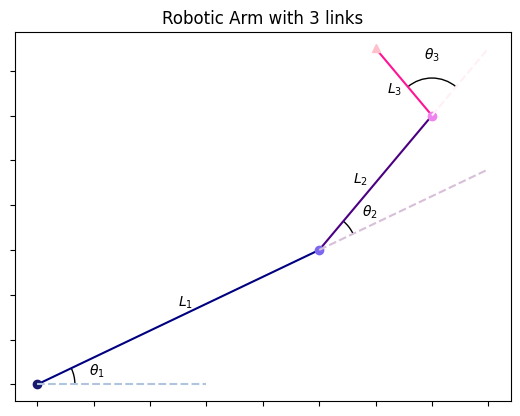

In [5]:
'''
The following class is miscellaneous code for the graphic. It can be found at:
https://matplotlib.org/stable/gallery/text_labels_and_annotations/angle_annotation.html#sphx-glr-gallery-text-labels-and-annotations-angle-annotation-py
'''
from matplotlib.patches import Arc
from matplotlib.transforms import Bbox, IdentityTransform, TransformedBbox


class AngleAnnotation(Arc):
    """
    Draws an arc between two vectors which appears circular in display space.
    """
    def __init__(self, xy, p1, p2, size=75, unit="points", ax=None,
                 text="", textposition="inside", text_kw=None, **kwargs):
        """
        Parameters
        ----------
        xy, p1, p2 : tuple or array of two floats
            Center position and two points. Angle annotation is drawn between
            the two vectors connecting *p1* and *p2* with *xy*, respectively.
            Units are data coordinates.

        size : float
            Diameter of the angle annotation in units specified by *unit*.

        unit : str
            One of the following strings to specify the unit of *size*:

            * "pixels": pixels
            * "points": points, use points instead of pixels to not have a
              dependence on the DPI
            * "axes width", "axes height": relative units of Axes width, height
            * "axes min", "axes max": minimum or maximum of relative Axes
              width, height

        ax : `matplotlib.axes.Axes`
            The Axes to add the angle annotation to.

        text : str
            The text to mark the angle with.

        textposition : {"inside", "outside", "edge"}
            Whether to show the text in- or outside the arc. "edge" can be used
            for custom positions anchored at the arc's edge.

        text_kw : dict
            Dictionary of arguments passed to the Annotation.

        **kwargs
            Further parameters are passed to `matplotlib.patches.Arc`. Use this
            to specify, color, linewidth etc. of the arc.

        """
        self.ax = ax or plt.gca()
        self._xydata = xy  # in data coordinates
        self.vec1 = p1
        self.vec2 = p2
        self.size = size
        self.unit = unit
        self.textposition = textposition

        super().__init__(self._xydata, size, size, angle=0.0,
                         theta1=self.theta1, theta2=self.theta2, **kwargs)

        self.set_transform(IdentityTransform())
        self.ax.add_patch(self)

        self.kw = dict(ha="center", va="center",
                       xycoords=IdentityTransform(),
                       xytext=(0, 0), textcoords="offset points",
                       annotation_clip=True)
        self.kw.update(text_kw or {})
        self.text = ax.annotate(text, xy=self._center, **self.kw)

    def get_size(self):
        factor = 1.
        if self.unit == "points":
            factor = self.ax.figure.dpi / 72.
        elif self.unit[:4] == "axes":
            b = TransformedBbox(Bbox.unit(), self.ax.transAxes)
            dic = {"max": max(b.width, b.height),
                   "min": min(b.width, b.height),
                   "width": b.width, "height": b.height}
            factor = dic[self.unit[5:]]
        return self.size * factor

    def set_size(self, size):
        self.size = size

    def get_center_in_pixels(self):
        """return center in pixels"""
        return self.ax.transData.transform(self._xydata)

    def set_center(self, xy):
        """set center in data coordinates"""
        self._xydata = xy

    def get_theta(self, vec):
        vec_in_pixels = self.ax.transData.transform(vec) - self._center
        return np.rad2deg(np.arctan2(vec_in_pixels[1], vec_in_pixels[0]))

    def get_theta1(self):
        return self.get_theta(self.vec1)

    def get_theta2(self):
        return self.get_theta(self.vec2)

    def set_theta(self, angle):
        pass

    # Redefine attributes of the Arc to always give values in pixel space
    _center = property(get_center_in_pixels, set_center)
    theta1 = property(get_theta1, set_theta)
    theta2 = property(get_theta2, set_theta)
    width = property(get_size, set_size)
    height = property(get_size, set_size)

    # The following two methods are needed to update the text position.
    def draw(self, renderer):
        self.update_text()
        super().draw(renderer)

    def update_text(self):
        c = self._center
        s = self.get_size()
        angle_span = (self.theta2 - self.theta1) % 360
        angle = np.deg2rad(self.theta1 + angle_span / 2)
        r = s / 2
        if self.textposition == "inside":
            r = s / np.interp(angle_span, [60, 90, 135, 180],
                                          [3.3, 3.5, 3.8, 4])
        self.text.xy = c + r * np.array([np.cos(angle), np.sin(angle)])
        if self.textposition == "outside":
            def R90(a, r, w, h):
                if a < np.arctan(h/2/(r+w/2)):
                    return np.sqrt((r+w/2)**2 + (np.tan(a)*(r+w/2))**2)
                else:
                    c = np.sqrt((w/2)**2+(h/2)**2)
                    T = np.arcsin(c * np.cos(np.pi/2 - a + np.arcsin(h/2/c))/r)
                    xy = r * np.array([np.cos(a + T), np.sin(a + T)])
                    xy += np.array([w/2, h/2])
                    return np.sqrt(np.sum(xy**2))

            def R(a, r, w, h):
                aa = (a % (np.pi/4))*((a % (np.pi/2)) <= np.pi/4) + \
                     (np.pi/4 - (a % (np.pi/4)))*((a % (np.pi/2)) >= np.pi/4)
                return R90(aa, r, *[w, h][::int(np.sign(np.cos(2*a)))])

            bbox = self.text.get_window_extent()
            X = R(angle, r, bbox.width, bbox.height)
            trans = self.ax.figure.dpi_scale_trans.inverted()
            offs = trans.transform(((X-s/2), 0))[0] * 72
            self.text.set_position([offs*np.cos(angle), offs*np.sin(angle)])
            
'''
Now, the graphic may be constructed. 
'''
# Create the figure
fig, ax = plt.subplots()
fig.canvas.draw() 
ax.set_title("Robotic Arm with 3 links")
ax.set_yticklabels([])
ax.set_xticklabels([])

# Annotate points and lines
center0 = (0,0)
center1 = (5, 6)
center2 = (7,12)
p1 = [(0, 0), (5, 6)]
p2 = [(5,6), (7, 12)]
p3 = [(7,12), (6, 15)]

ax.text(2.5, 3.5, r"$L_{1}$")
ax.text(5.6, 9, r"$L_{2}$")
ax.text(6.2, 13, r"$L_{3}$")
line1, = ax.plot(*zip(*p1), color = "navy")
line2, = ax.plot(*zip(*p2), color = "indigo")
line3, = ax.plot(*zip(*p3), color = "deeppink")
point0, = ax.plot(*center0, marker="o", color = "midnightblue")
point1, = ax.plot(*center1, marker="o", color = "mediumslateblue")
point2, = ax.plot(*center2, marker="o", color = "violet")
end = ax.plot(6, 15, marker="^", color = "pink")

# Create dotted lines for the angles
p0_a = [(0,0), (3,0)]
p1_a = [(5,6), (8,9.6)]
p2_a = [(7,12), (8,15)]
aux_line_0 = ax.plot(*zip(*p0_a), linestyle="--", color = "lightsteelblue")
aux_line_1 = ax.plot(*zip(*p1_a), linestyle="--", color = "thistle")
aux_line_2 = ax.plot(*zip(*p2_a), linestyle="--", color = "lavenderblush")

# Finally, create angles
am1 = AngleAnnotation(center0, p0_a[0], p1[1], ax=ax, size=75, text=r"$\theta_{1}$", textposition="outside")
am2 = AngleAnnotation(center1, p1_a[1], p2[1], ax=ax, size=75, text=r"$\theta_{2}$", textposition="outside")
am3 = AngleAnnotation(center2, p2_a[1], p3[1], ax=ax, size=75, text=r"$\theta_{3}$", textposition="outside")

There is a clear pattern forming. Analyzing it in the same way the first proposed problem, the 2-linked robotic arm, was analyzed, it is noticeable that the coordinates for the end points of each link are dependent on the angles that said links make with the direction of the link before them, which in turn is dependent on the angle it makes with the one before them. It is a composition of the angles that then determine how each of the $L_{i}$'s "contributes" to the position of each coordinate. 

It is clear that, for this case, the position of the end of the arm in cartesian coordinates is given by the following equations:
$$
x(\theta_{1}, \theta_{2}, \theta_{3}) = L_{1} \cos (\theta_{1}) + L_{2} \cos (\theta_{1} + \theta_{2}) + L_{3} \cos (\theta_{1} + \theta_{2} + \theta_{3}) \\
y(\theta_{1}, \theta_{2}, \theta_{3}) = L_{1} \sin (\theta_{1}) + L_{2} \sin (\theta_{1} + \theta_{2}) + L_{3} \sin (\theta_{1} + \theta_{2} + \theta_{3})
$$ 
The resulting linear system is as follows:
$$
F_{1}(\theta_{1}, \theta_{2}, \theta_{3}) = x(\theta_{1}, \theta_{2}, \theta_{3}) - x_{d} = 0 \\
F_{2}(\theta_{1}, \theta_{2}, \theta_{3}) = y(\theta_{1}, \theta_{2}, \theta_{3}) - y_{d} = 0
$$

Now, understanding the structure of the problem, one may generalize its form. Suppose now that there is a robotic arm with $n$ links, and the objective is the same as before: Find a configuration in which the robotic arm's extreme may reach an end point $(x_{d}, y_{d})$. 

In this configuration, each link has an associated length $L_{i}$ and an associated angle $\theta_{i}$, with $i \in \{1,2,\dots,n\}$, where $\theta_{1}$ is the angle that the first link makes with the x-axis, $\theta_{2}$ is the angle that the second link makes with respect to the direction of the first link, $\theta_{3}$ is the one the third link makes with the second link, and so on. We incur in the following notation to express the vectors comprised of the lengths of the links and the angles of the links:
$$
\bold{L} = [L_{1}, \ L_{2}, \ \dots, \ L_{n}]^{T}
\\
\bold{\theta} = [\theta_{1}, \ \theta_{2}, \ \dots, \ \theta_{n}]^{T}
$$

The resulting equations for the positions for the extreme of the robotic arm are as follows:
$$
x(\bold{\theta}) = \sum_{i = 1}^{n} L_{i} \cos (\sum_{j=1}^{i} \theta_{j})
\\
y(\bold{\theta}) = \sum_{i = 1}^{n} L_{i} \sin (\sum_{j=1}^{i} \theta_{j})
$$
And the corresponding system of equations is, of course:
$$
F_{1}(\bold{\theta}) = x(\bold{\theta}) - x_{d} = 0 \\
F_{2}(\bold{\theta}) = y(\bold{\theta}) - y_{d} = 0
$$

Again, it is important to see if a given end point is reachable with the arm. The upper bound is clear.
$$
\sqrt{x_{d}^{2} + y_{d}^{2}} \leq \sum_{i = 1}^{n} L_{i}
$$

The lower bound, not so much. In the case with $n = 2$ links, the closest you could get to the origin (equivalently, the closest you could get the arm to its "base"), was obtained by throwing out the first link in any direction, and then putting the other link in the reverse direction, trying to get back to the zero point. This would result in how close can the end point be while being reachable. When trying this with $3$ links, however, the process isn't that simple. Trying to put all links on the same line (making their respective angles either $180°$ or $360°$ degrees) won't always give the closest distance; angling the links _just right_ might probably get closer, or even exactly to, the zero point. 

The trick is in the angling. The reasoning is this, supposing that $n \geq 3$: Put the first link in any direction. Put the following links all facing the opposite direction to that first link. If the line made up by the all the links (that aren't the first one) starting at the end of the first link goes beyond the origin, then the origin is reachable and therefore there is no lower bound for how close the end point can be (except from $0$, of course). **Why?** This is a bold claim, and maybe it is not proper to leave this unproven for the rigour of this work; however, the proof of this is out-of-scope of the task at hand, and is left to the reader. To view it geometrically, take the same construction from before (the first link in one direction, and the others in the opposite one) and, if it surpasses the origin, try moving one of the link's end points (not the last link) to the side. This will change the starting point of the next link, but the other end point of that link should still be in the line proposed by the direction of the first link. By doing this movement, notice how the final end point of the arm is closer to the origin. This process is repeatable until the base is reached. 